## Graph balance application
#### Create a random connected graph with number of nodes in range $[L , R]$
> How program works
+ Run each cell (top->down)
+ You gonna be asked to enter $L$ and $R$ (the nodes number range)
+ You gonna be asked to enter the edges' weights positivity threshold
    - The application will generate random number for each edge, and it's weight will be assigned to positive if this random number passes the threshould
+ Finally, checking the graph balance through checking every possible triple edges
    - _you can makesure using the plotted graph_ 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import operator
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
def read():
    l, r = map(int,input("Enter left and right values for nodes range [l,r] ").split(" "))

    numOfNodes = random.randint(l,r)
    
    lst = random.sample(range(1,100),numOfNodes)
    
    return lst

In [3]:
def getThreshold():
    
    weightProbability = int(input("Enter weights positivity threshold, range [0,10]"))
    for (u,v,w) in G.edges(data=True):
        roll = random.randint(0,10)
        w['weight'] = 0 if (roll < weightProbability) else 1

In [4]:
def chkBalance():
    
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    flag = len(G.nodes()) > 2
    
    for i in range(0,len(weights)-2):
        for j in range (i+1,len(weights)-1):
            for k in range (j+1,len(weights)):
                a, b, c = weights[i],weights[j],weights[k]
                flag &= (a and b and c) or (a and not b and not c) or (b and not a and not c) or (c and not a and not b)
    return "Balanced Graph" if flag else "Unbalanced Graph"

In [5]:
def showMe(theLabel):
    
    print("The graph has the following edges:")
    
    for (u,v,w) in G.edges(data=True):
        print("from",u,"to",v,", weight =",w['weight'])
            
    pos = nx.spring_layout(G,k=len(G.nodes()))

    labels = nx.get_edge_attributes(G,'weight')

    for (k,v) in labels:
       labels[k,v] = '+' if labels[k,v] == 1 else '-'

    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    plt.title(theLabel)
    
    nx.draw(G,pos,node_color='pink',edgelist=edges,edge_color=weights, width=1.5, with_labels = True)

    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    
    plt.show()

Enter left and right values for nodes range [l,r] 5 6
Enter weights positivity threshold, range [0,10]4
The graph has the following edges:
from 85 to 25 , weight = 0
from 85 to 43 , weight = 0
from 85 to 92 , weight = 1
from 85 to 42 , weight = 0
from 85 to 15 , weight = 0
from 25 to 43 , weight = 0
from 25 to 92 , weight = 1
from 25 to 42 , weight = 1
from 25 to 15 , weight = 1
from 43 to 92 , weight = 0
from 43 to 42 , weight = 0
from 43 to 15 , weight = 1
from 92 to 42 , weight = 1
from 92 to 15 , weight = 0
from 42 to 15 , weight = 1


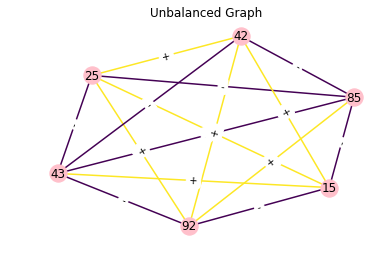

In [6]:
nodes = read()

G = nx.complete_graph(nodes)

getThreshold()

showMe(chkBalance())